In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv('onlinefraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [3]:
data.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [4]:
type=data["type"].value_counts()
transaction=type.index
quantity=type.values

import plotly.express as px
figure=px.pie(data,
              values=quantity,
              names=transaction,hole=.45,
              title="Distribution of Transaction Type")
figure.show()

In [5]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
# numeric_data 
correlation= numeric_data .corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [6]:
data["type"]=data["type"].map({
    "CASH_OUT":1,"PAYMENT":2,
    "CASH_IN":3,"TRANSFER":4,
    "DEBIT":5
})
data["isFraud"]=data["isFraud"].map({0:"No Fraud",1:"Fraud"})
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


In [7]:
from sklearn.model_selection import  train_test_split
x=np.array(data[["type","amount","oldbalanceOrg","newbalanceOrig"]])
y=np.array(data[["isFraud"]])
y=y.ravel()
y

array(['No Fraud', 'No Fraud', 'Fraud', ..., 'Fraud', 'Fraud', 'Fraud'],
      dtype=object)

In [8]:
#Decesion Tree Model
from sklearn.tree import DecisionTreeClassifier
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=42)
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)


DecisionTreeClassifier()

In [39]:
#Accuracy of Decesion Tree Model
from sklearn.metrics import accuracy_score
y_pred=model.predict(xtest)
accuracy_Decision_Tree=accuracy_score(ytest,y_pred)
print("Accuracy of Decesion tree Model: ",accuracy_Decision_Tree)

Accuracy of Decesion tree Model:  0.9997076675960532


In [40]:
#Recall of Decesion Tree Model
from sklearn.metrics import recall_score
recall_Decision_tree=recall_score(ytest,y_pred,average="weighted")
print("Recall of Decesion tree Model: ",recall_Decision_tree)

Recall of Decesion tree Model:  0.9997076675960532


In [41]:
#precision of Decesion Tree Model
from sklearn.metrics import precision_score
precision_Decision_Tree=precision_score(ytest,y_pred,average="weighted")
print("Precision of Decesion tree Model: ",precision_Decision_Tree)

Precision of Decesion tree Model:  0.9997064430435235


In [46]:
#F1 Score of Decesion Tree Model
from sklearn.metrics import f1_score
f1_Decision_Tree=f1_score(ytest,y_pred,average="weighted")
print("F1 Score of Decesion tree Model: ",f1_Decision_Tree)

F1 Score of Decesion tree Model:  0.9997070340778591


In [10]:
#features=[type,amount,oldbalanceOrg,newbalanceOrig]
features=np.array([[4,9000.60,10900.60,0.0]])
print(model.predict(features))

['Fraud']


#### Random Forest Classifier

In [11]:
#Random forest model
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(xtrain,ytrain)

RandomForestClassifier()

In [130]:
y_predReg=random_forest.predict(xtest)
accuracyReg=accuracy_score(ytest,y_predReg)
print("Accuracy of Regression tree Model: ",accuracyReg)

Accuracy of Regression tree Model:  0.9997375295082843


Classifaction Report - Random Forest Model 
              precision    recall  f1-score   support

       Fraud       0.90      0.89      0.90      1620
    No Fraud       1.00      1.00      1.00   1270904

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix - Random Forest Model 


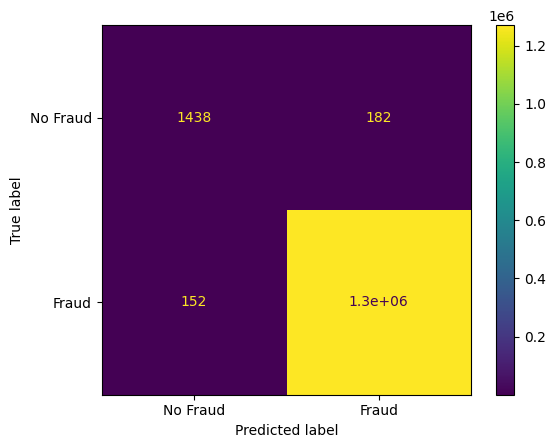

In [18]:


# Classifiacation report
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, precision_score, recall_score
classification_report_rf=classification_report(ytest,y_predReg)
print("Classifaction Report - Random Forest Model ")
print(classification_report_rf)

#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_rf=confusion_matrix(ytest,y_predReg)
print("Confusion Matrix - Random Forest Model ")
display_labels=["No Fraud","Fraud"]
matrix=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf,display_labels=display_labels)
matrix.plot()
plt.show()

precision_random_forest=precision_score(ytest,y_predReg,pos_label="Fraud")
recall_random_forest=recall_score(ytest,y_predReg,pos_label="Fraud")

In [47]:
#F1 Score of Random Forest Model
f1_random_forest=f1_score(ytest,y_predReg,average="weighted")
print("F1 Score of Random Forest Model: ",f1_random_forest)

F1 Score of Random Forest Model:  0.9997363045595612


In [ ]:
#features=[type,amount,oldbalanceOrg,newbalanceOrig]
# features=np.array([[4,9000.60,10900.60,100.0]])
pred_Regression=pd.DataFrame(random_forest.predict(xtest))
pred_Regression.tail()

,0
1272519,No Fraud
1272520,No Fraud
1272521,No Fraud
1272522,No Fraud
1272523,No Fraud


### Comparisons

In [48]:
algorithm=["Decision Tree","Random Forest"]
accuracy=[accuracy_Decision_Tree,accuracyReg]
precision_scores=[precision_Decision_Tree,precision_random_forest]
recall_scores=[recall_Decision_tree,recall_random_forest]
f1_score=[f1_Decision_Tree,f1_random_forest]

data={"Algorithm":algorithm,
      "Accuracy":accuracy,
      "Precision":precision_scores,
      "Recall":recall_scores,
      "F1 Score":f1_score
    }

In [49]:
comparison=pd.DataFrame(data)
print(comparison)


       Algorithm  Accuracy  Precision    Recall  F1 Score
0  Decision Tree  0.999708   0.999706  0.999708  0.999707
1  Random Forest  0.999738   0.904403  0.887654  0.999736


##### Decision Tree is recommended due to its high precision (0.999706)
 which minimizes false positives. This means it excels at correctly identifying genuine transactions. This is crucial when false positives (incorrectly classifying genuine transactions as fraudulent) are highly undesirable.
- Decision Tree is a strong choice due to its high precision, making it ideal for minimizing false positives.
- If the cost of missing fraudulent transactions is a major concern, Random Forest could be an alternative.


In [174]:
#How many Fraud and No Fraud Predicted
y_predReg=pd.DataFrame(y_predReg)
PredictedFraud=y_predReg[0].value_counts()
print("PredictedFraud: ",PredictedFraud)

#How many Fraud and No Fraud in Test Data
ytest=pd.DataFrame(ytest)
ActualFraud=ytest[0].value_counts()
print("ActualFraud: ",ActualFraud)

#diiferece between Predicted Fraud and Actual Fraud

PredictedFraud:  0
No Fraud    1270934
Fraud          1590
Name: count, dtype: int64
ActualFraud:  0
No Fraud    1270904
Fraud          1620
Name: count, dtype: int64


In [181]:
#pie chart of Predicted Fraud
import plotly.express as px
fig=px.bar(PredictedFraud,
            x=PredictedFraud.index,
            y=PredictedFraud.values,
            title="Predicted Fraud",
            labels={"x":"Fraud","y":"Count"},
            
            )


fig.show()

      

In [188]:

#Accuracy of Decesion Tree Model and Random Forest Model
import plotly.express as px
comparison=pd.DataFrame(data)
figure=px.scatter(comparison,x="Algorithm",y="Accuracy",color="Algorithm",title="Comparison of Accuracy")
figure.show()